In [1]:
import pandas as pd

In [31]:
df= {
    "Name": ["Moh", "Ali", "Sam", "Sali", "Sandra"],
    "Math" : [55, 65, 99, 85, 78],
    "Science": [66, 75, 58, 85, 66],
    "Geography": [75, 52, 66, 64, 80],
    "History": [47, 74, 63, 67, 80]
}

In [27]:
df

{'Name': ['Moh', 'Ali', 'Sam', 'Sali', 'Sandra'],
 'Math': [55, 65, 99, 85, 60, 78],
 'Science': [66, 75, 58, 85, 66],
 'Geography': [75, 52, 66, 64, 80],
 'History': [47, 74, 63, 67, 80]}

In [32]:
df = pd.DataFrame(df)

In [33]:
df

,Name,Math,Science,Geography,History
0,Moh,55,66,75,47
1,Ali,65,75,52,74
2,Sam,99,58,66,63
3,Sali,85,85,64,67
4,Sandra,78,66,80,80


In [44]:
df_melted = pd.melt(
                   df,
                   id_vars = ["Name"],
                   value_vars= ["Math", "Science", "Geography", "History"],
                   var_name= "Subject",
                   value_name = "Score")

In [1]:
#df_melted

In [2]:
import pandas as pd

In [3]:
ls

FAO1.ipynb
Production_Crops_Livestock_E_All_Data.csv
Production_Crops_Livestock_E_All_Data_NOFLAG.csv
Production_Crops_Livestock_E_AreaCodes.csv
Production_Crops_Livestock_E_Elements.csv
Production_Crops_Livestock_E_Flags.csv
Production_Crops_Livestock_E_ItemCodes.csv
Untitled.ipynb


In [5]:
df= pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False)

In [35]:
year_columns = [col for col in df.columns if col.startswith("Y")]
df_long= pd.melt(
                 df,
                 id_vars= ['Area', 'Item', 'Element', 'Unit'],
                 value_vars= year_columns,
                 value_name= 'Value', 
                 var_name = 'Year')
df_long['Year'] = df_long['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_long = df_long[df_long['Value'] != 0]
df_long = df_long.dropna(subset = 'Value')
df_long['Value'] = pd.to_numeric(df_long["Value"], errors= 'coerce')

In [44]:
df_long['Item'].unique()

array(['Apples', 'Apricots', 'Asses', 'Barley',
       'Butter and ghee of sheep milk', 'Butter of cow milk', 'Camels',
       'Cantaloupes and other melons', 'Cattle', 'Cattle fat, unrendered',
       'Cheese from milk of goats, fresh or processed',
       'Cheese from milk of sheep, fresh or processed', 'Chickens',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, chilled or frozen',
       'Edible offals of camels and other camelids, fresh, chilled or frozen',
       'Fat of camels', 'Figs', 'Game meat, fresh, chilled or frozen',
       'Goat fat, unrendered', 'Goats', 'Grapes',
       'Hen eggs in shell, fresh', 'Horses', 'Linseed', 'Maize (corn)',
       'Meat of camels, fresh or chilled',
       'Meat of cattle with the bone, fresh or chilled',
       'Meat of chickens, fresh or chilled',
       'Meat of goat, fresh

In [77]:
# List of crops you're interested in
crops = ['Wheat', 'Rice, paddy', 'Maize', 'Barley', 'Soybeans']

# Filter your long-format dataframe
selected_crops = df_long[df_long['Item'].isin(crops)]

In [78]:
#selected_corps
# summarize production over time:
trends_crops= selected_corps.groupby(['Year', 'Item'])['Value'].sum().reset_index()

'module://matplotlib_inline.backend_inline'

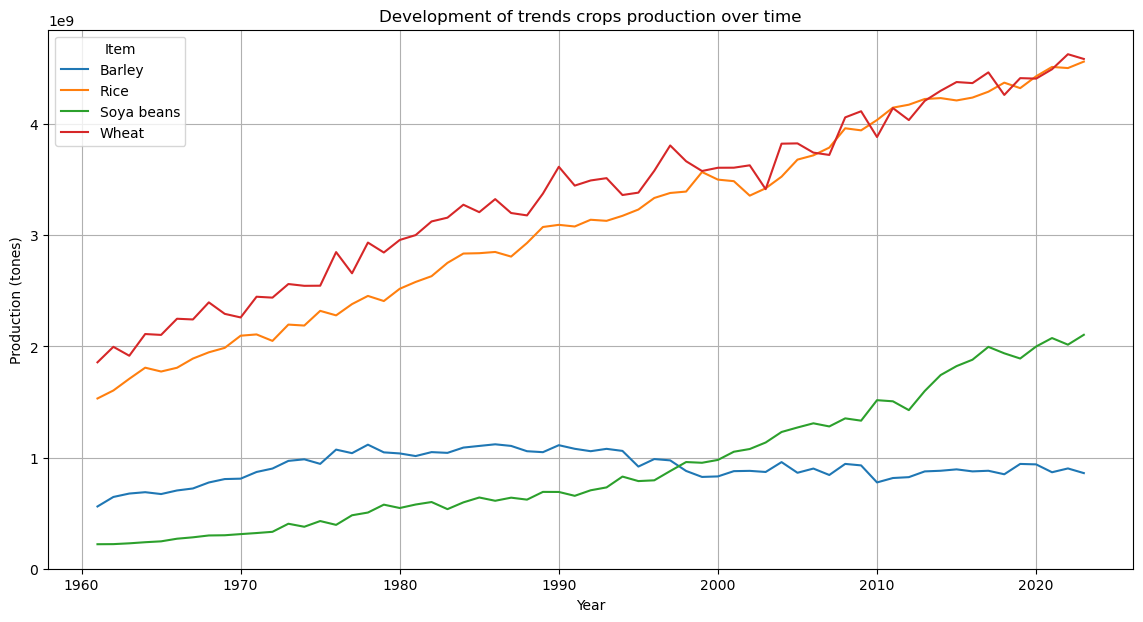

In [79]:
# Plot Multi-Crop Trends:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.lineplot(data = trends_crops, x= 'Year', y= 'Value', hue= 'Item')
plt.title('Development of trends crops production over time')
plt.xlabel('Year')
plt.ylabel('Production (tones)')
plt.grid()
plt.get_backend()

In [80]:
#compare crop growth rates (crop vs crop)
# which crops are growing fastest?
# which crops are declining:
trends_crops= trends_crops.sort_values(['Item', 'Year'])
# noe calculate the % change for each crop
trends_crops['growth_rate'] = trends_crops.groupby('Item')['Value'].pct_change() *100

In [81]:
trends_crops

,Year,Item,Value,growth_rate
0,1961,Barley,5.595886e+08,NaN
4,1962,Barley,6.452744e+08,15.312271
8,1963,Barley,6.759998e+08,4.761608
12,1964,Barley,6.881106e+08,1.791545
16,1965,Barley,6.714033e+08,-2.428002
...,...,...,...,...
235,2019,Wheat,4.415106e+09,3.547133
239,2020,Wheat,4.410664e+09,-0.100611
243,2021,Wheat,4.495068e+09,1.913638
247,2022,Wheat,4.630301e+09,3.008470


<Axes: xlabel='Year', ylabel='growth_rate'>

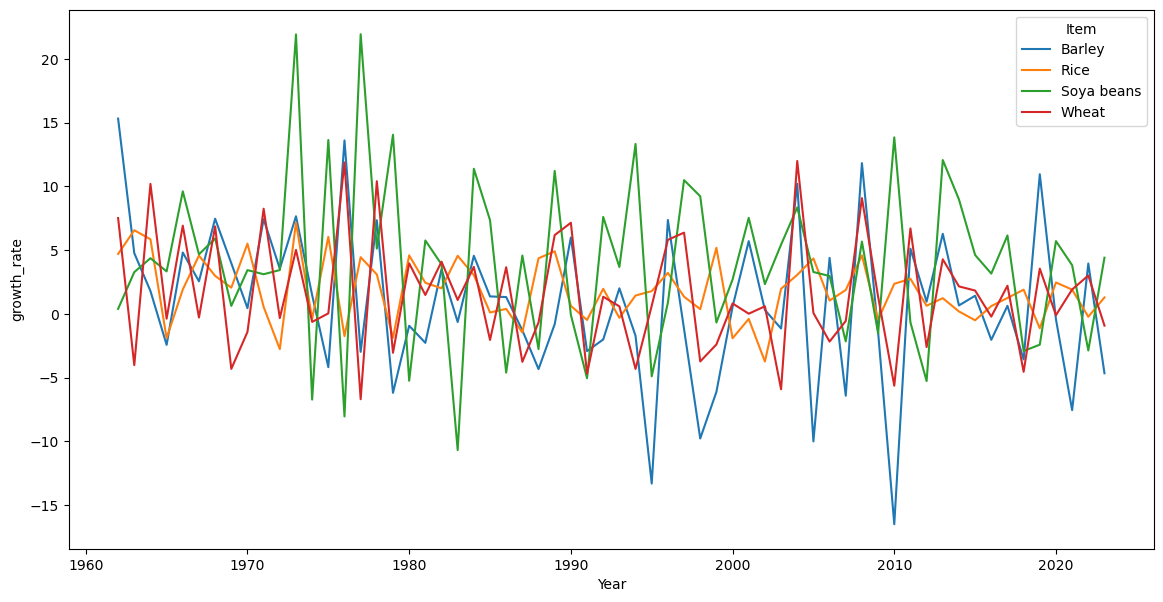

In [83]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=trends_crops, x = 'Year', y = 'growth_rate', hue= 'Item')